In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\hospitality project\\sunshine_hotels_data.csv')

In [3]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,"4,000",Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,1,3,1,"3,500",Travel Management Company,Cognizant,Sales Portfolio 1,January,2020
2,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"4,500",Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019
3,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"7,000",Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019
4,Westside Comfort Hotel,Ghaziabad,Business,2,1,1,"7,500",Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       39861 non-null  object
 1   city             39861 non-null  object
 2   hotel_type       39861 non-null  object
 3   hotel_category   39861 non-null  int64 
 4   zone             39861 non-null  int64 
 5   room_nights      39861 non-null  int64 
 6   room_revenue     39861 non-null  object
 7   business_source  39861 non-null  object
 8   account_name     39861 non-null  object
 9   sales_portfolio  39861 non-null  object
 10  month            39861 non-null  object
 11  year             39861 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.6+ MB


In [5]:
df['hotel_name']=df['hotel_name'].str.strip()

In [6]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


hotel_name
Premium Suites               2832
Deccan Comfort               2352
Kalyan Essentials            1969
Airport Comfort              1952
Raille's Inn Essentials      1550
                             ... 
Comfort Surajkund              10
Pure Comfort Hotel              8
Venetian  Comfort               6
Valley View Comfort Hotel       3
Hotel Forest Comfort            2
Name: hotel_name, Length: 80, dtype: int64

city
Bengaluru      9227
Chennai        4264
New Delhi      3185
Hyderabad      2815
Jaipur         1792
Mumbai         1695
Chandigarh     1245
Ahmedabad      1062
Ludhiana       1009
Gurgaon        1004
Kochi           920
Ranchi          889
Lucknow         814
Amritsar        810
Zirakpur        783
Dehradun        756
Tirupati        641
Trivandrum      635
Gandhidham      576
Faridabad       480
Agra            476
Roorkee         425
Solapur         383
Pune            369
Jalandhar       355
Ghaziabad       354
Kakinada        347
Raipur          323
Jodhp

In [7]:
df['hotel_category']=df['hotel_category'].replace([1,2,3,4],['Economy','Midscale','Upscale','Upper Upscale'])

In [8]:
df['zone']=df['zone'].replace([1,2,3,4],['North','East','South','West'])

In [9]:
print(df[['city',"hotel_name"]].value_counts().to_markdown())

|                                            |    0 |
|:-------------------------------------------|-----:|
| ('Bengaluru', 'Premium Suites')            | 2832 |
| ('Bengaluru', 'Deccan Comfort')            | 2352 |
| ('Chennai', 'Kalyan Essentials')           | 1969 |
| ('New Delhi', 'Airport Comfort')           | 1952 |
| ('Chennai', "Raille's Inn Essentials")     | 1550 |
| ('Bengaluru', 'Grand Hotel Bengaluru')     | 1508 |
| ('Bengaluru', 'South Star Comfort Inn')    | 1405 |
| ('Chandigarh', 'Essentials Chandigarh')    | 1245 |
| ('Ahmedabad', 'Riverside Comfort Hotel')   | 1062 |
| ('Gurgaon', 'Comfort Gurgaon')             | 1004 |
| ('Hyderabad', 'Grand Hitec City')          |  996 |
| ('Hyderabad', "Sander's Comfort")          |  988 |
| ('Ranchi', 'Hotel Business Comfort')       |  889 |
| ('Kochi', 'The Southern Comfort')          |  871 |
| ('Jaipur', 'Rajputana Comfort Jaipur')     |  842 |
| ('Hyderabad', "Sander's Essentials")       |  831 |
| ('Amritsar', 'Chariot Comf

In [11]:
df[df['room_revenue'] == 4800000]

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year


In [12]:
df.drop(df[df['room_revenue'] == ' -   '].index, inplace = True)

In [13]:
df["room_revenue"] = df["room_revenue"].str.replace(",","")

In [14]:
df['room_revenue']=df['room_revenue'].astype(int)

In [15]:
df['business_source'].value_counts()

 Corporate                     18750
Travel Management Company      12303
 Travel Management Company      6818
 Travel Agent                   1387
 Social                          353
Corporate                        222
Travel Agent                      16
Name: business_source, dtype: int64

In [16]:
df['business_source'] = df['business_source'].str.strip()

In [17]:
df['business_source'].value_counts()

Travel Management Company    19121
Corporate                    18972
Travel Agent                  1403
Social                         353
Name: business_source, dtype: int64

In [18]:
df.describe()

,room_nights,room_revenue,year
count,39849.000000,3.984900e+04,39849.000000
mean,5.365128,2.063235e+04,2019.744511
std,21.712913,8.276424e+04,1.492888
min,1.000000,5.900000e+02,2018.000000
25%,1.000000,4.000000e+03,2018.000000
50%,2.000000,7.600000e+03,2019.000000
75%,4.000000,1.600000e+04,2021.000000
max,961.000000,4.800000e+06,2022.000000


In [19]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,Midscale,South,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,Economy,South,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020
2,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019
3,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019
4,Westside Comfort Hotel,Ghaziabad,Business,Midscale,North,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018


In [20]:
df.groupby('year').sum()['room_nights']/365

year
2018    146.931507
2019    176.775342
2020     59.591781
2021     71.238356
2022    131.202740
Name: room_nights, dtype: float64

In [21]:
df['rooms_per_day'] = np.where(df['year']==2022,round(df['room_nights']/212,3),round(df['room_nights']/365,3))

In [22]:
df['room_revenue_per_day'] = np.where(df['year']==2022,round(df['room_revenue']/212,3),round(df['room_revenue']/365,3))

In [23]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,rooms_per_day,room_revenue_per_day
0,South Star Comfort Inn,Bengaluru,Business,Midscale,South,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,0.005,18.868
1,Kalyan Essentials,Chennai,Business,Economy,South,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,0.003,9.589
2,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019,0.003,12.329
3,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019,0.003,19.178
4,Westside Comfort Hotel,Ghaziabad,Business,Midscale,North,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018,0.003,20.548


# UNIVARIATE ANALYSIS

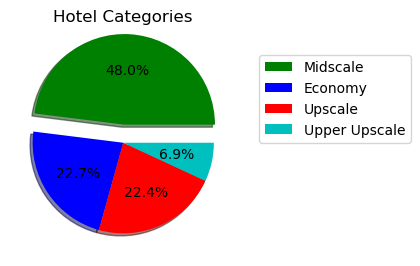

Midscale         19138
Economy           9026
Upscale           8932
Upper Upscale     2753
Name: hotel_category, dtype: int64


In [24]:
hotel_categories = df['hotel_category'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=hotel_categories,x='hotel_category',autopct="%1.1f%%",shadow=True,explode=[0.2,0,0,0],colors=['g','b','r','c'])
labels =hotel_categories['index'].unique()
plt.title("Hotel Categories")
plt.legend(labels,loc=(1.1,0.5))
plt.show()

print(df['hotel_category'].value_counts())

**Almost half of the hotels are Midscale Hotel Category.<br>
Economy and Upscale hotel type are around 23% each.<br>
Lowest being Upper Upscale Hotel Category.**

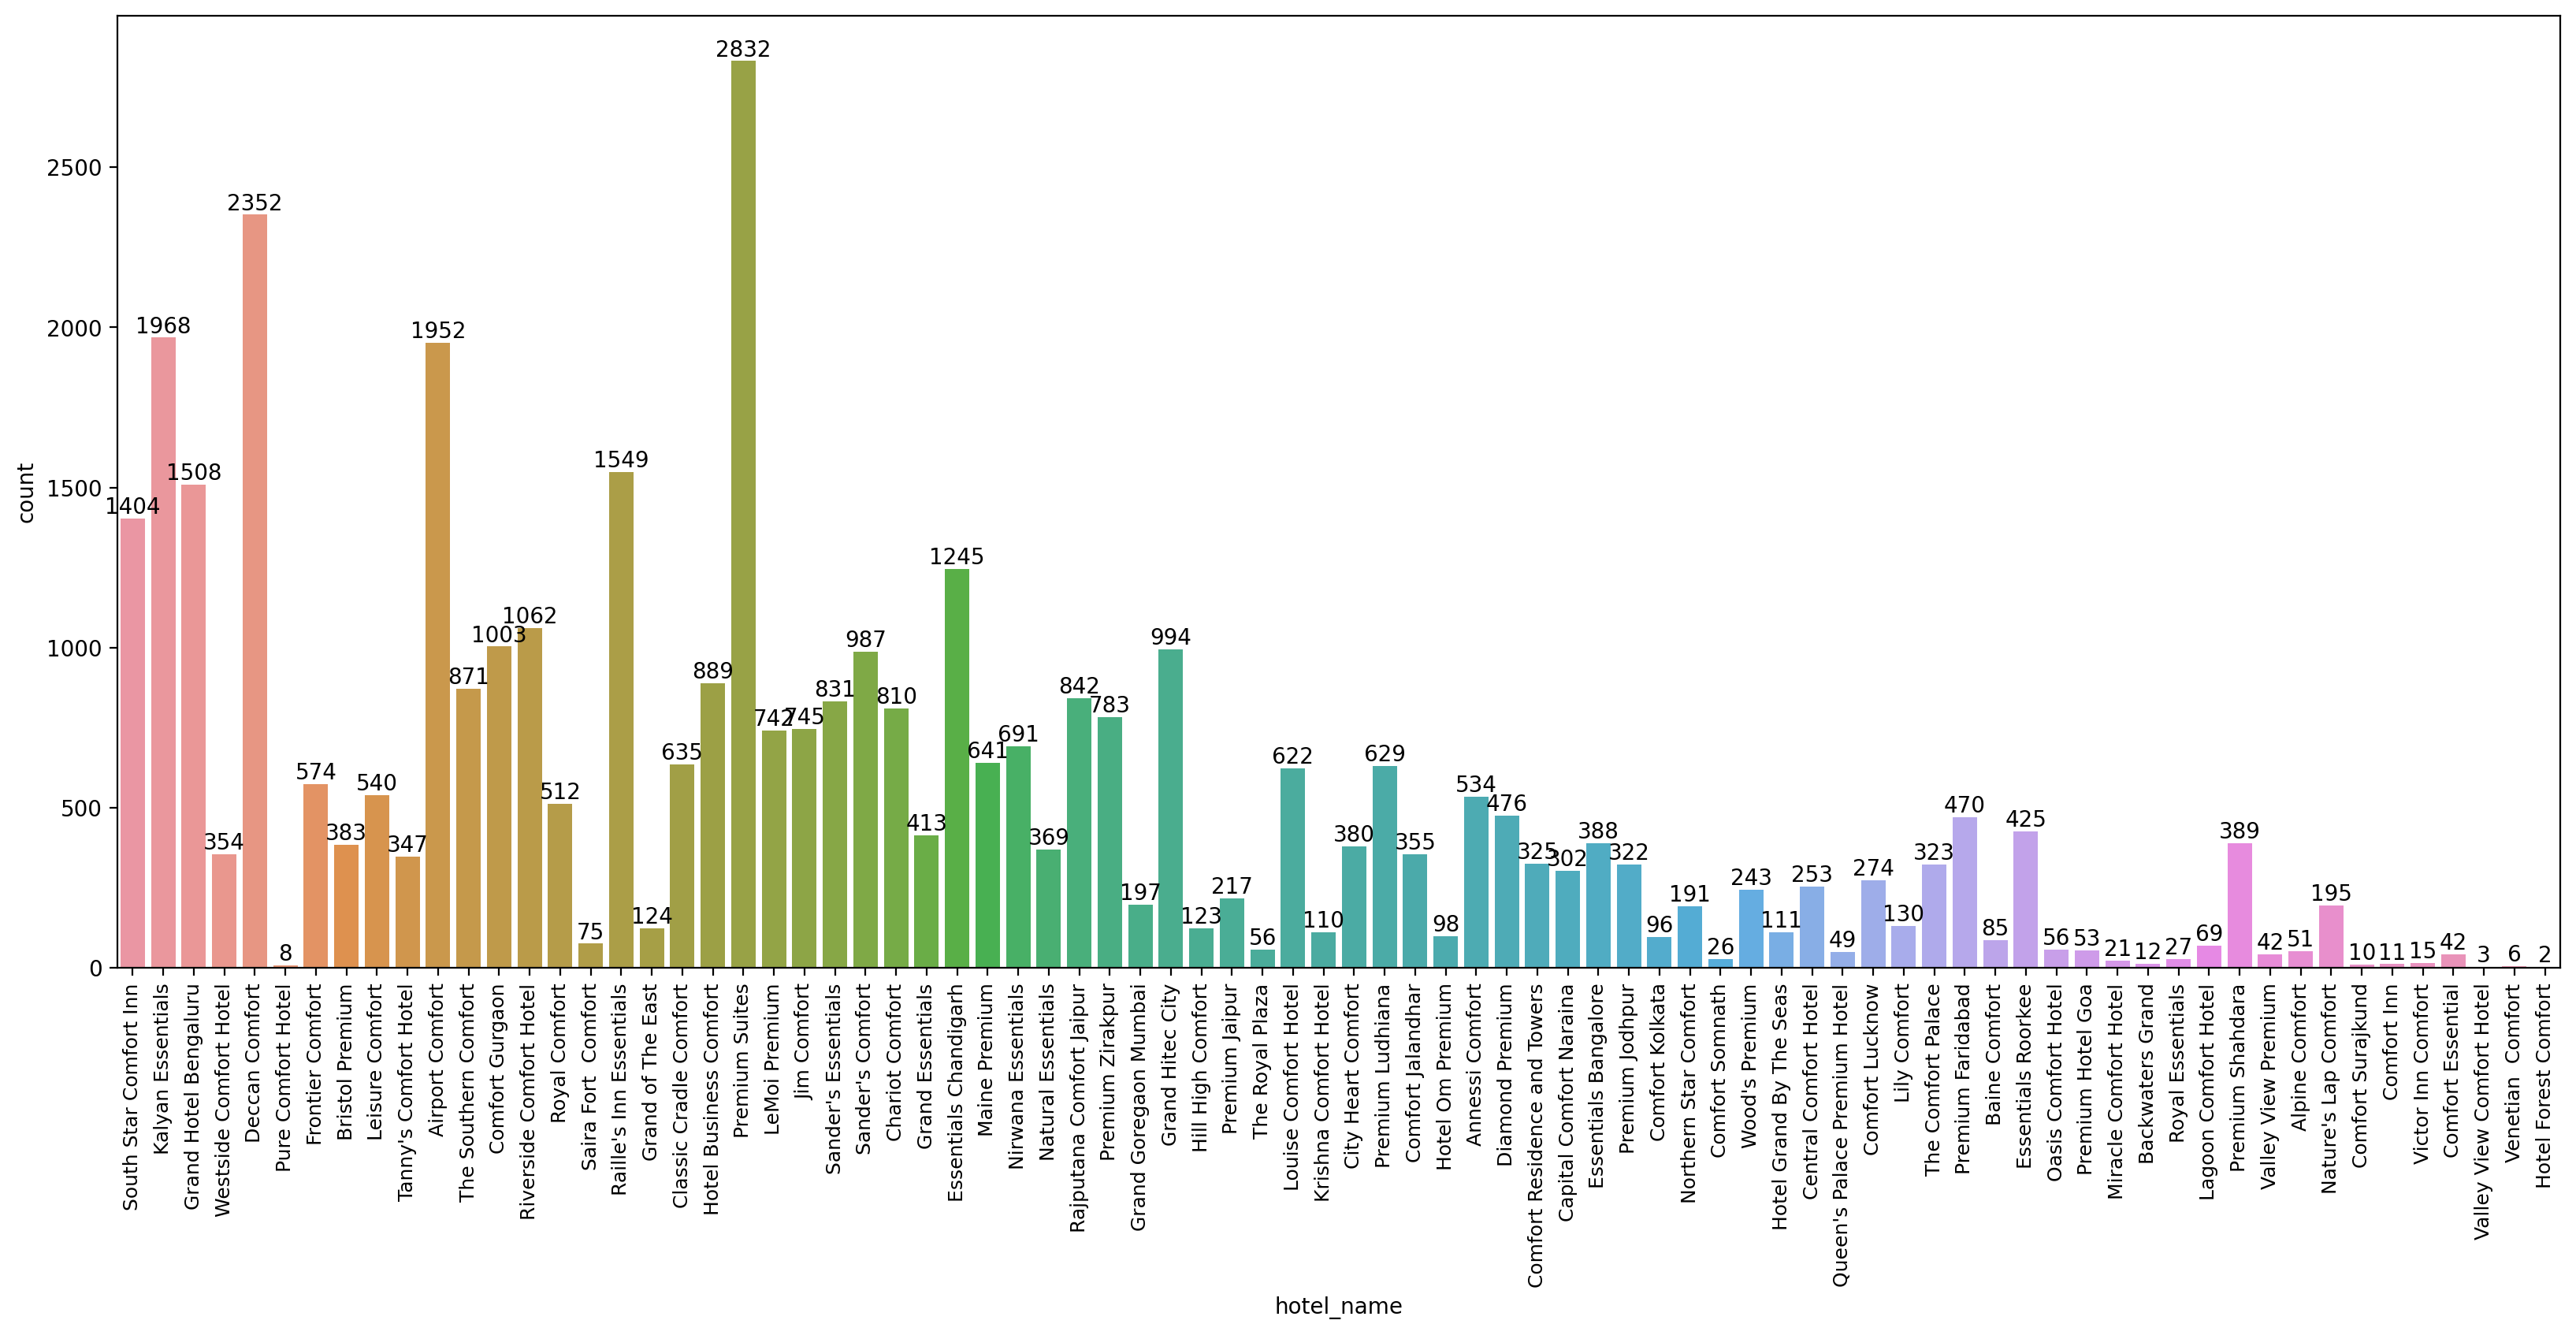

In [25]:
plt.figure(figsize=(20,8),dpi=200)
ax = sns.countplot(data=df,x='hotel_name')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=9)
for i in ax.containers:
    ax.bar_label(i,)

**Premium Suites(Banglore) is the most busy and most mentioned Hotel.After it Deccan Comfort(Banglore) is the most busy.<br>
Least busy are Valley View Comfort Hotel(Musoorie) and Hotel Forest Comfort(Bhimtal).**

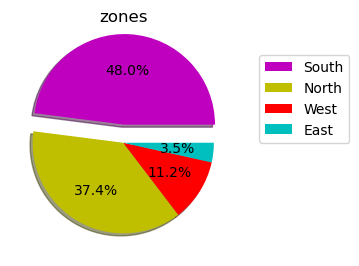

South    19119
North    14901
West      4446
East      1383
Name: zone, dtype: int64


In [26]:
zones = df['zone'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=zones,x='zone',autopct="%1.1f%%",shadow=True,explode=[0.2,0,0,0],colors=['m','y','r','c'])
labels =zones['index'].unique()
plt.title("zones")
plt.legend(labels,loc=(1.1,0.5))
plt.show()

print(df['zone'].value_counts())

**Most number of hotels are in South Zone,then in North.<br>
Leat number of hotels are in East Zone.**

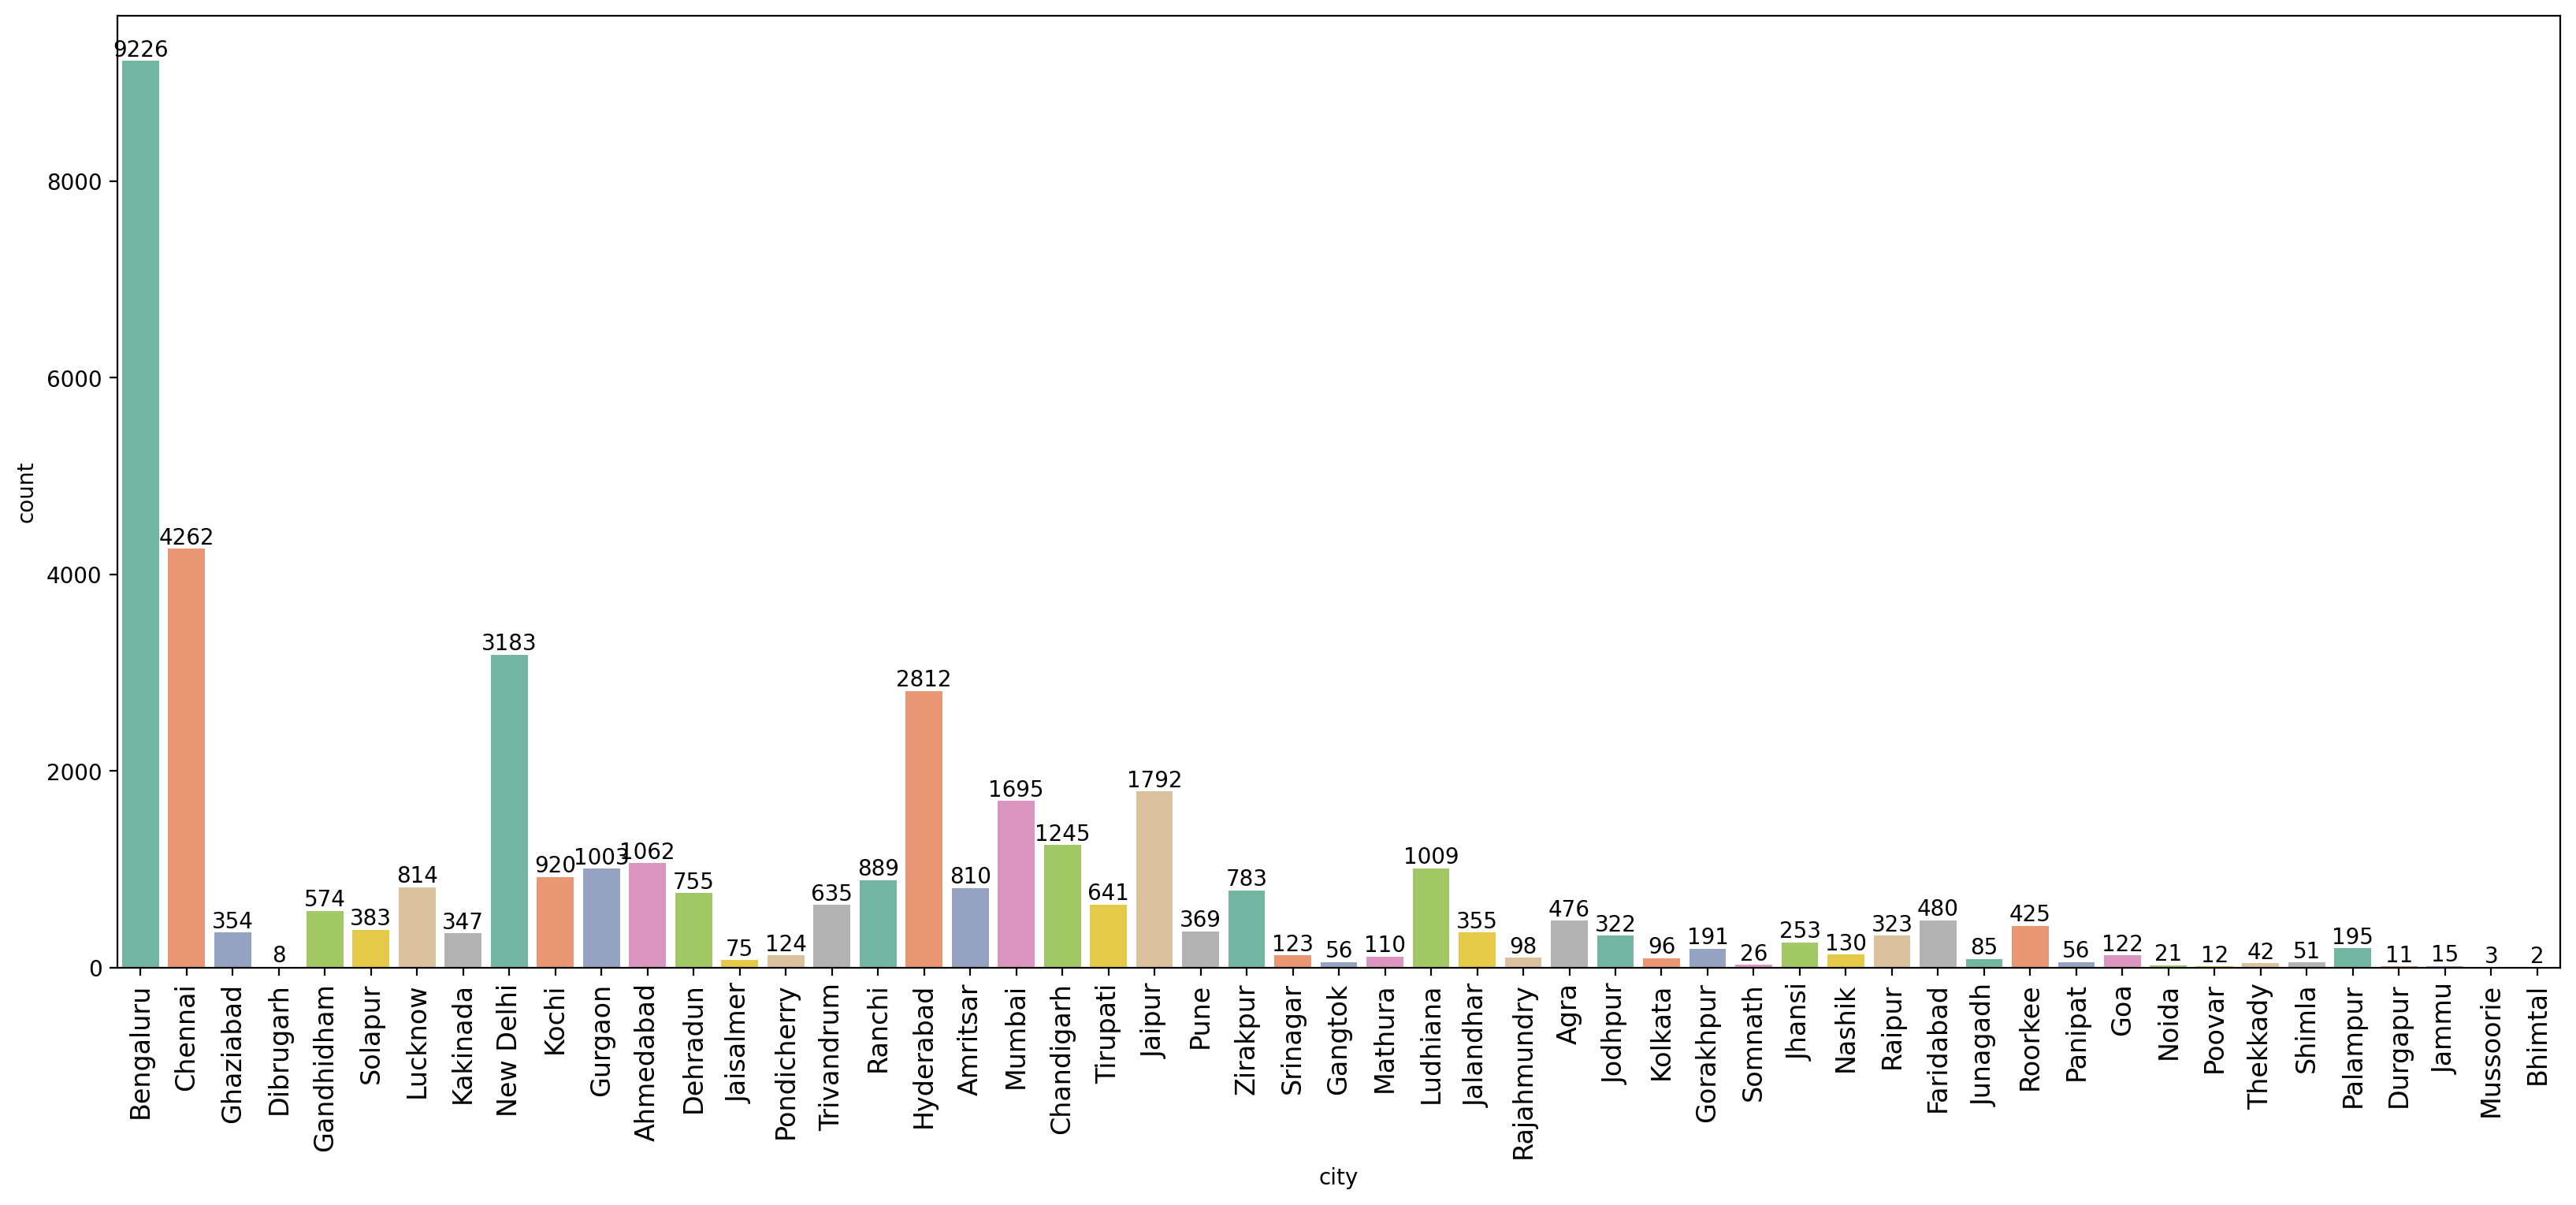

In [27]:
plt.figure(figsize=(20,8),dpi=200)
ax = sns.countplot(data=df,x='city',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)
for i in ax.containers:
    ax.bar_label(i,)

**Most number of Hotels are in Banglore city and then in Chennai.<br>
Least number of hotels are in Mussorie and Bhimtal.**

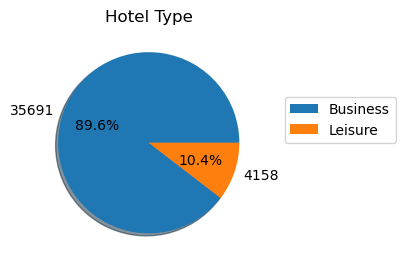

Business    35691
Leisure      4158
Name: hotel_type, dtype: int64


In [28]:
hotel_types = df['hotel_type'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=hotel_types,x='hotel_type',labels='hotel_type',autopct="%1.1f%%",shadow=True)
labels =hotel_types['index'].unique()
plt.title("Hotel Type")
plt.legend(labels,loc=(1.1,0.5))
plt.show()


print(df['hotel_type'].value_counts())

**About 90% of hotels are of Business Type and rest are Leisure type of hotel.**

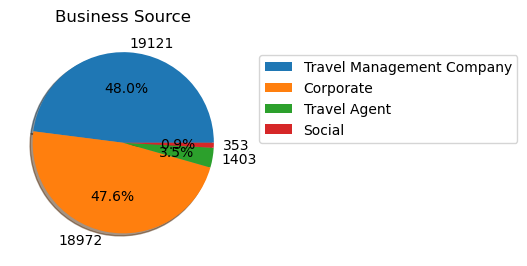

Travel Management Company    19121
Corporate                    18972
Travel Agent                  1403
Social                         353
Name: business_source, dtype: int64


In [29]:
business_sources = df['business_source'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=business_sources,x='business_source',labels='business_source',autopct="%1.1f%%",shadow=True)
labels =business_sources['index'].unique()
plt.title("Business Source")
plt.legend(labels,loc=(1.1,0.5))
plt.show()


print(df['business_source'].value_counts())

**Travel Management Company and Corporate contribute around 48% each of business source.<br>
Travel Agent and Social contribute around 3.5% and 1% of business source Respectively.**                       

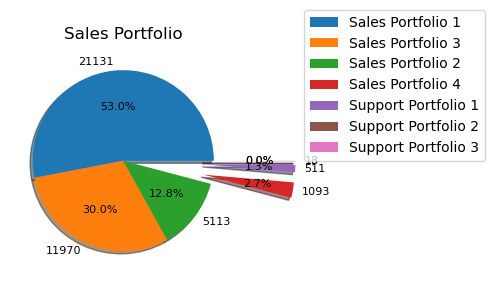

Sales Portfolio 1      21131
Sales Portfolio 3      11970
Sales Portfolio 2       5113
Sales Portfolio 4       1093
Support Portfolio 1      511
Support Portfolio 2       18
Support Portfolio 3       13
Name: sales_portfolio, dtype: int64


In [30]:
sales_portfolios = df['sales_portfolio'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=sales_portfolios,x='sales_portfolio',labels='sales_portfolio',shadow=True,explode=[0,0,0,0.9,0.9,0.9,0.9],autopct="%1.1f%%",textprops={'fontsize': 8})
labels =sales_portfolios['index'].unique()
plt.title("Sales Portfolio")
plt.legend(labels,loc=(1.3,0.5))
plt.show()


print(df['sales_portfolio'].value_counts())

**In Sales Portfolio- Sales Portfolio 1 performed best Covering around 53% sales,Sales Portfolio 3 is the second based performer with 30% of sales.<br>
In Support Portfolio - Support Portfolio 1 performed good among the 3 with 1.3% sales.**

<AxesSubplot:xlabel='room_revenue'>

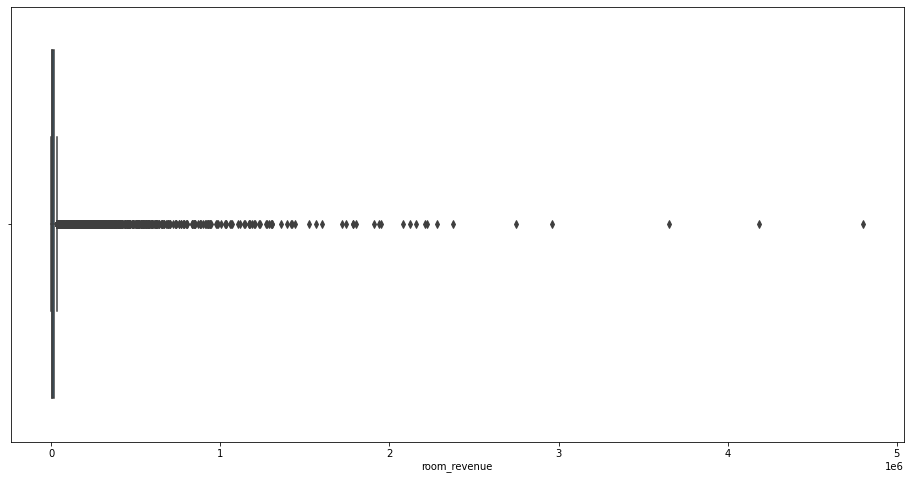

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(x='room_revenue',data=df)

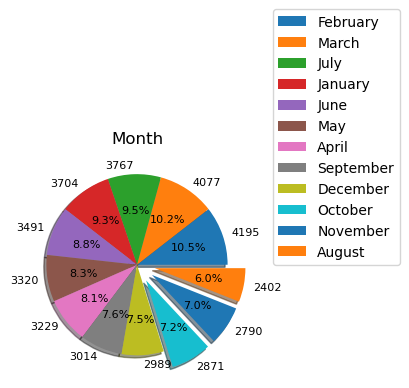

February     4195
March        4077
July         3767
January      3704
June         3491
May          3320
April        3229
September    3014
December     2989
October      2871
November     2790
August       2402
Name: month, dtype: int64


In [32]:
months = df['month'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=months,x='month',labels='month',shadow=True,autopct="%1.1f%%",textprops={'fontsize': 8},explode=[0,0,0,0,0,0,0,0,0,0.2,0.2,0.2])
labels =months['index'].unique()
plt.title("Month")
plt.legend(labels,loc=(1.1,0.5))
plt.show()


print(df['month'].value_counts())

**Considering in which month hotel rooms got mostly sold.<br>
February and then March is the month which is most busy,considering the fact that we dont have data after of the year 2022 after july.**

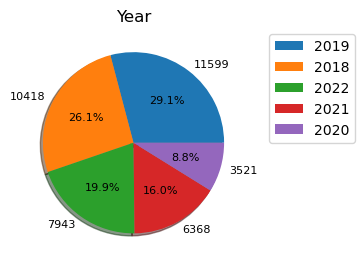

2019    11599
2018    10418
2022     7943
2021     6368
2020     3521
Name: year, dtype: int64


In [33]:
years = df['year'].value_counts().reset_index()

plt.figure(figsize=(6,3),dpi=100)
plt.pie(data=years,x='year',labels='year',shadow=True,autopct="%1.1f%%",textprops={'fontsize': 8})
labels =years['index'].unique()
plt.title("Year")
plt.legend(labels,loc=(1.1,0.5))
plt.show()


print(df['year'].value_counts())

**2019 is the year in which most of the rooms were occupied.
However considering the fact that we only have half data of 2021,if we go by trends then 2022 will surely beat 2019 in terms of rooms occupancy.**

# BIVARIATE ANALYSIS

In [34]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,rooms_per_day,room_revenue_per_day
0,South Star Comfort Inn,Bengaluru,Business,Midscale,South,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,0.005,18.868
1,Kalyan Essentials,Chennai,Business,Economy,South,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,0.003,9.589
2,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019,0.003,12.329
3,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019,0.003,19.178
4,Westside Comfort Hotel,Ghaziabad,Business,Midscale,North,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018,0.003,20.548


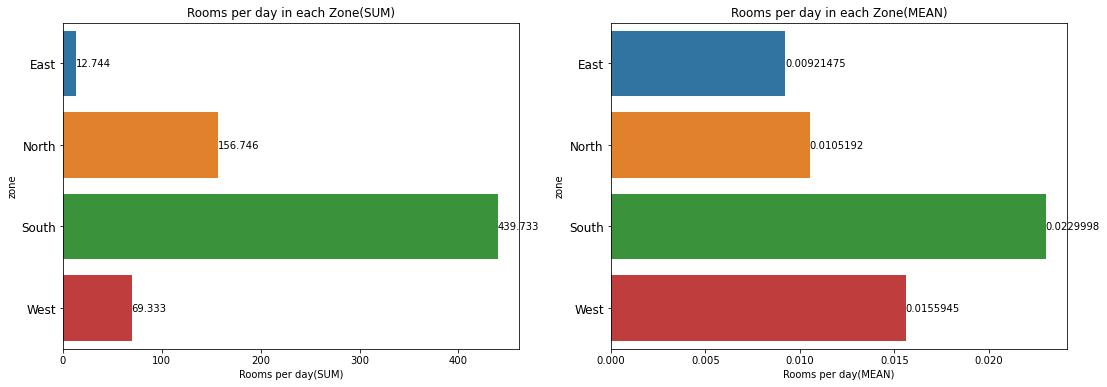

In [35]:
a=df.groupby(['zone']).mean()['rooms_per_day'].reset_index()
b=df.groupby(['zone']).sum()['rooms_per_day'].reset_index()
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax=sns.barplot(ax=axes[0],data=b,x='rooms_per_day',y='zone')
ax1=sns.barplot(ax=axes[1],data=a,x='rooms_per_day',y='zone')

ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.bar_label(ax.containers[0])

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12)
ax1.bar_label(ax1.containers[0])

    
axes[0].set_xlabel('Rooms per day(SUM)') 
axes[1].set_xlabel('Rooms per day(MEAN)') 
    
axes[0].set_title('Rooms per day in each Zone(SUM)')
axes[1].set_title('Rooms per day in each Zone(MEAN)')

plt.show()


**Max Sum and Mean of Revenue per day is Maximum is in South.<br>
A Variation can be seen in East and West where Mean of Revenue per day is higher as compared to South and North.**

<AxesSubplot:xlabel='room_nights', ylabel='hotel_type'>

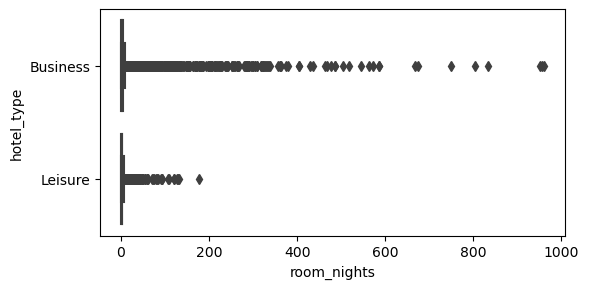

In [36]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(data=df,x='room_nights',y='hotel_type')

**

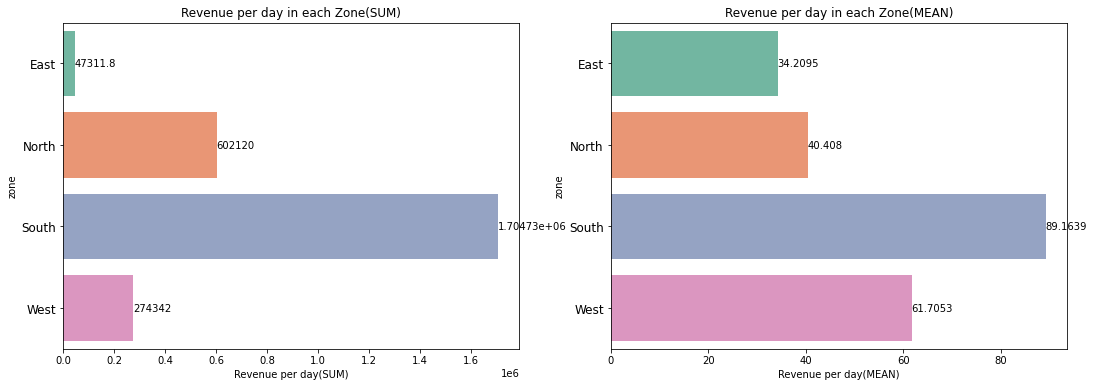

In [37]:
a=df.groupby(['zone']).mean()['room_revenue_per_day'].reset_index()
b=df.groupby(['zone']).sum()['room_revenue_per_day'].reset_index()
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax=sns.barplot(ax=axes[0],data=b,x='room_revenue_per_day',y='zone',palette='Set2')
ax1=sns.barplot(ax=axes[1],data=a,x='room_revenue_per_day',y='zone',palette='Set2')


ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.bar_label(ax.containers[0])

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12)
ax1.bar_label(ax1.containers[0])


    
axes[0].set_xlabel('Revenue per day(SUM)') 
axes[1].set_xlabel('Revenue per day(MEAN)') 
    
axes[0].set_title('Revenue per day in each Zone(SUM)')
axes[1].set_title('Revenue per day in each Zone(MEAN)')

plt.show()


**Max Sum and Mean of Revenue per day is Maximum is in South.<br>
A Variation can be seen in West where Sum of Revenue per day is 27342 and Mean is 62 i.e Revenue per day is higher compared to other zones.<br>**

In [38]:
a=df.groupby(['zone']).mean()['room_revenue_per_day'].reset_index()

<AxesSubplot:xlabel='room_revenue', ylabel='hotel_type'>

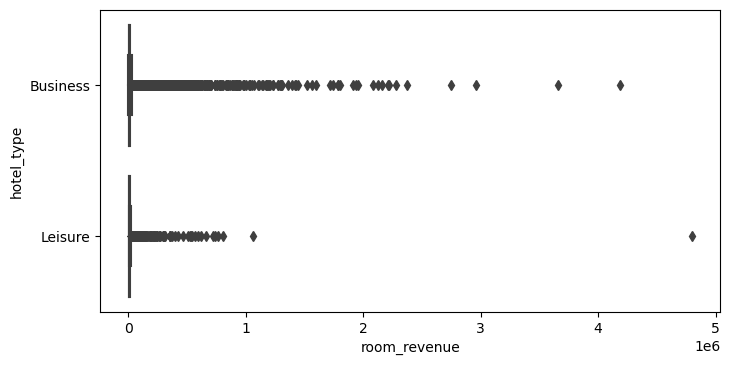

In [39]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=df,x='room_revenue',y='hotel_type')

**Max Room Revenue obtained from Business hotel type and it has a lot of Variation.<br>
However,in Leisure an outlier found having Max Room Revenue Overall.**

<AxesSubplot:xlabel='month', ylabel='room_revenue'>

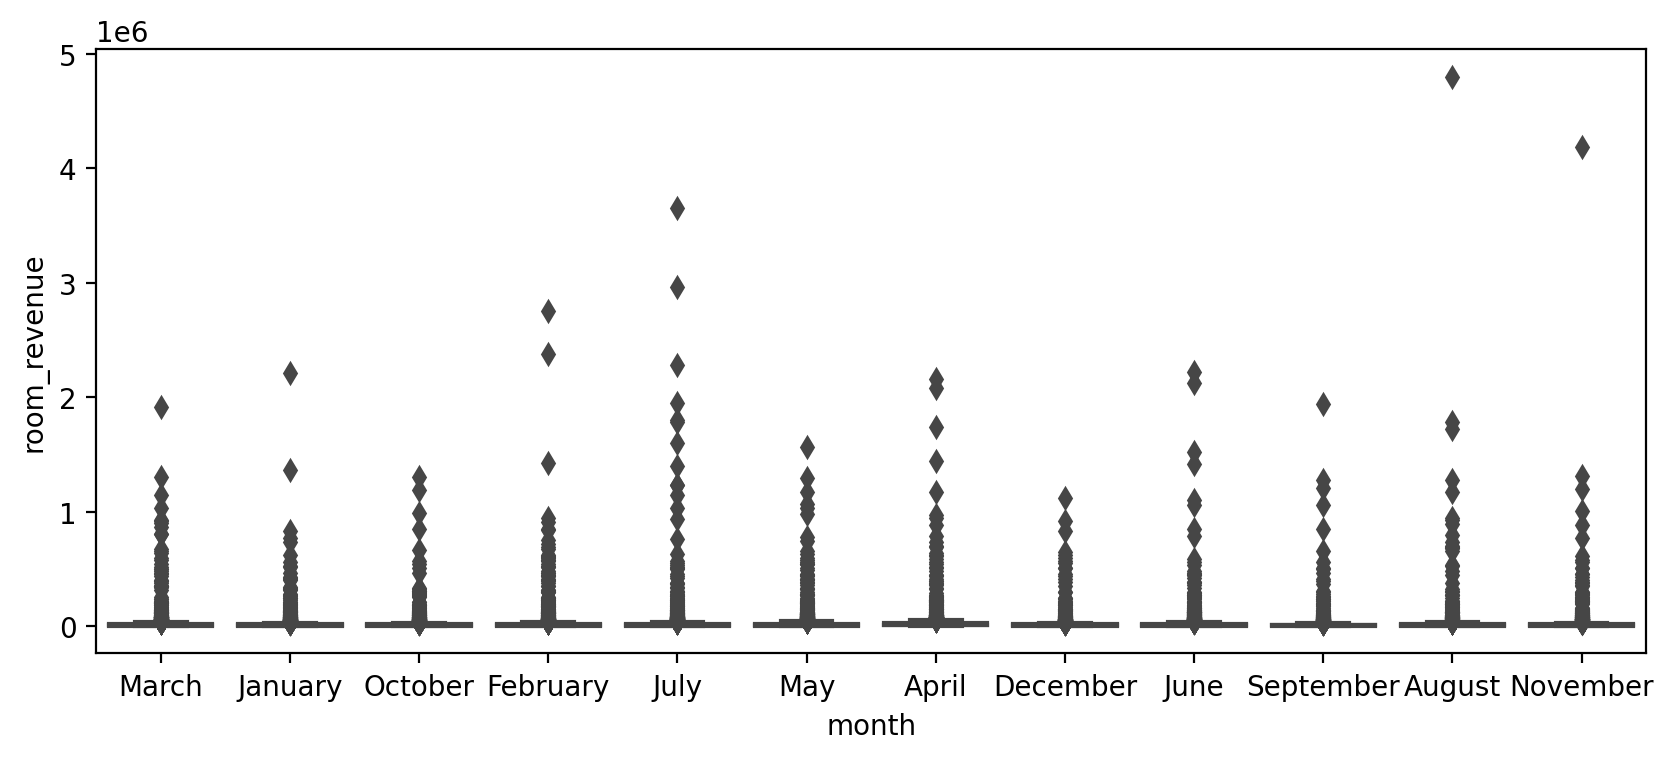

In [40]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='month',y='room_revenue')

**Max room revenue obtained is in the month of July,August,November.**

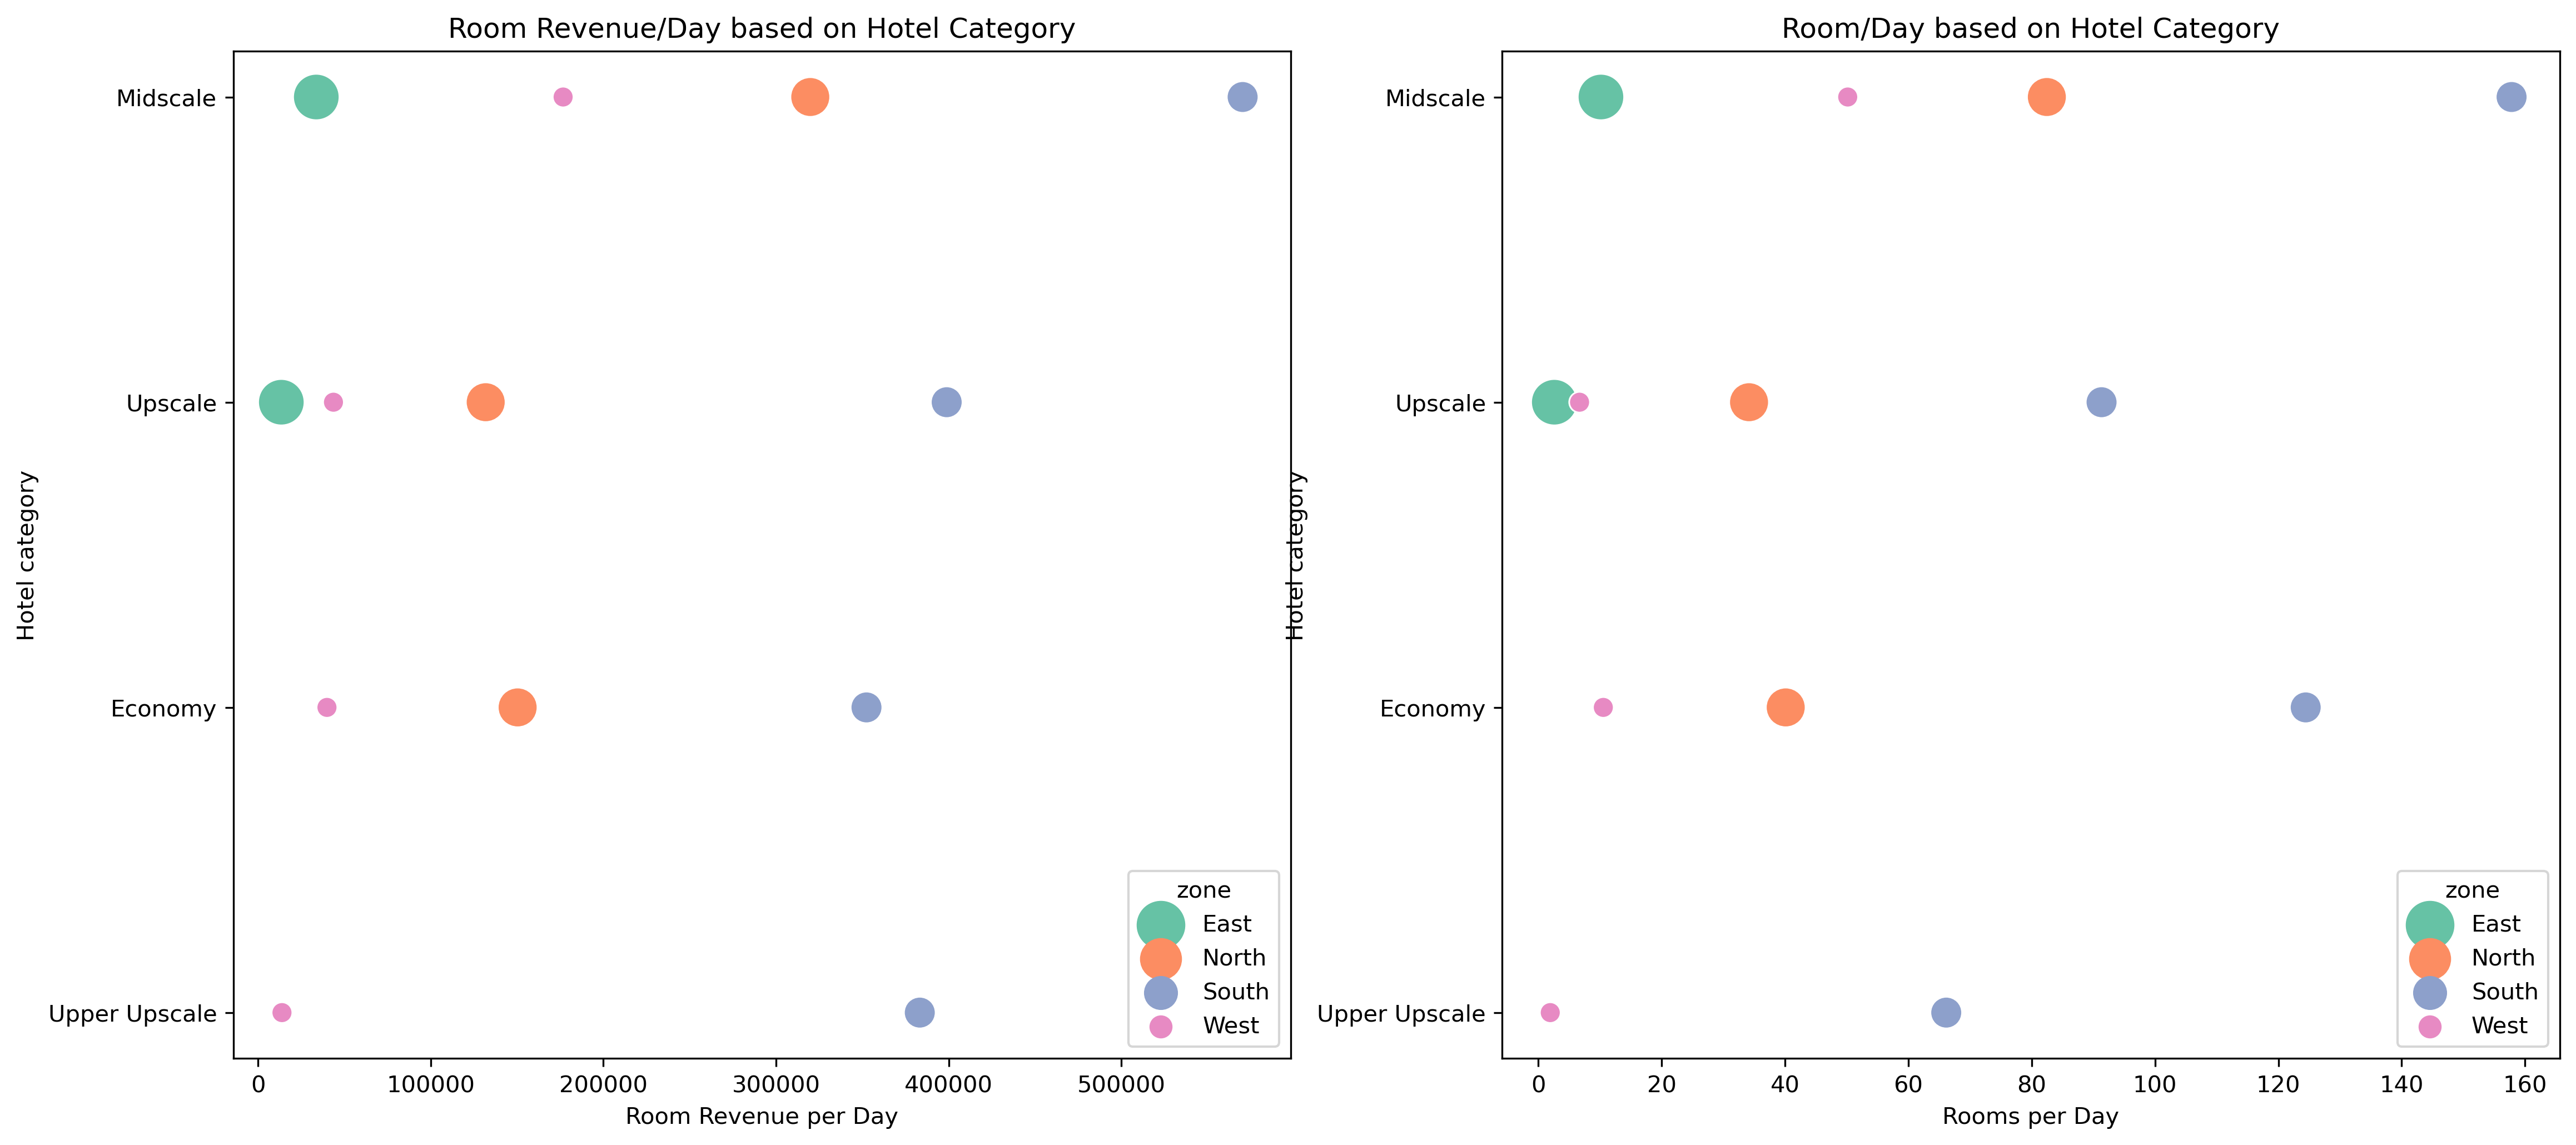

zone   hotel_category
East   Midscale           33781.117
       Upscale            13530.644
North  Economy           150380.876
       Midscale          319848.696
       Upscale           131890.226
South  Economy           352399.173
       Midscale          570218.950
       Upper Upscale     383264.543
       Upscale           398842.346
West   Economy            39966.758
       Midscale          176724.269
       Upper Upscale      13915.848
       Upscale            43735.075
Name: room_revenue_per_day, dtype: float64


In [41]:
a=df.groupby(['zone','hotel_category']).sum()['room_revenue_per_day'].reset_index()
b=df.groupby(['zone','hotel_category']).sum()['rooms_per_day'].reset_index()

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,8),dpi=300)
ax=sns.scatterplot(ax=axes[0],data=a,x='room_revenue_per_day',y='hotel_category',hue='zone',palette='Set2',size="zone",sizes=(80,400))
ax1=sns.scatterplot(ax=axes[1],data=b,x='rooms_per_day',y='hotel_category',palette='Set2',hue='zone',size="zone",sizes=(80,400))


axes[0].set_ylabel('Hotel category') 
axes[1].set_ylabel('Hotel category') 
axes[0].set_xlabel('Room Revenue per Day') 
axes[1].set_xlabel('Rooms per Day') 
    
axes[0].set_title('Room Revenue/Day based on Hotel Category')
axes[1].set_title('Room/Day based on Hotel Category')

plt.show()

print(df.groupby(['zone','hotel_category']).sum()['room_revenue_per_day'])

**Changes can be seen in Rooms/day and Revenue/day-
In South - Upscale,Economy,Upper Scale hotel Category has variations in Rooms/day and Revenue/day.**

hotel_type
Business    633.499
Leisure      45.057
Name: rooms_per_day, dtype: float64


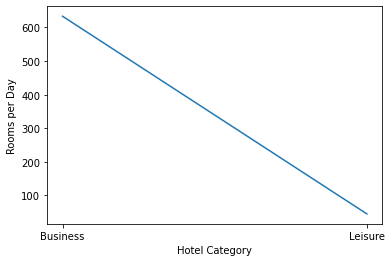

In [42]:
a = df.groupby('hotel_type').sum()['rooms_per_day'].reset_index()

sns.lineplot(data=a,x='hotel_type',y='rooms_per_day')

plt.ylabel('Rooms per Day')
plt.xlabel('Hotel Category')
print(df.groupby('hotel_type').sum()['rooms_per_day'])

**Rooms per Day is highest in Business and lowest in Leisure.**

sales_portfolio
Sales Portfolio 1      1580028.510
Sales Portfolio 2       344693.904
Sales Portfolio 3       612057.247
Sales Portfolio 4        53605.910
Support Portfolio 1      34505.165
Support Portfolio 2       2863.651
Support Portfolio 3        744.134
Name: room_revenue_per_day, dtype: float64


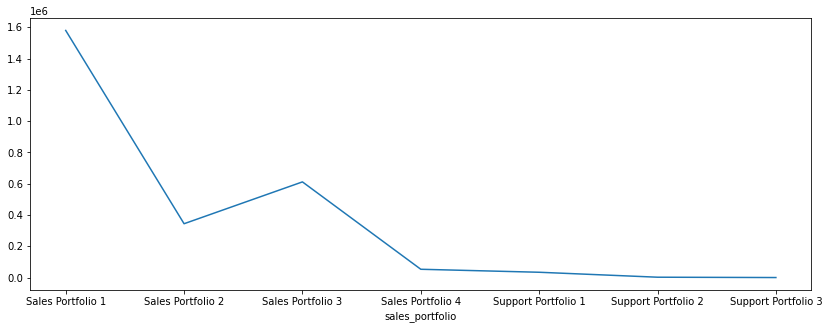

In [43]:
fig, ax = plt.subplots(figsize=(14,5))
df.groupby('sales_portfolio').sum()['room_revenue_per_day'].plot(ax=ax)

print(df.groupby('sales_portfolio').sum()['room_revenue_per_day'])

**Revenue Per Day is highest in Sales Portfolio 1 and and then in sales portfolio 3 and after that in Sales Portfolio 2.After this it keeps on Declining in Sales Portfolio 4,Support Portfolio1,2,3.**

business_source
Corporate                    1810321.670
Social                         37689.760
Travel Agent                  238390.706
Travel Management Company     542096.385
Name: room_revenue_per_day, dtype: float64


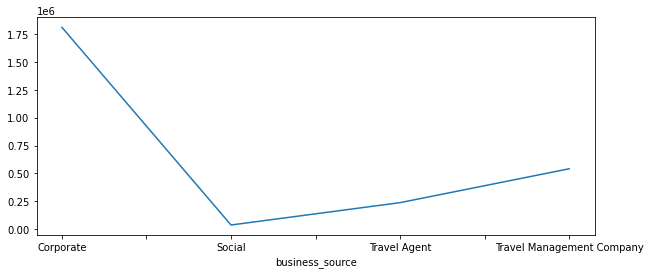

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
df.groupby('business_source').sum()['room_revenue_per_day'].plot(ax=ax)

print(df.groupby('business_source').sum()['room_revenue_per_day'])

**Maximum revenue from the Corporate Business source,least being Social Business Source.**

<AxesSubplot:xlabel='year', ylabel='room_revenue'>

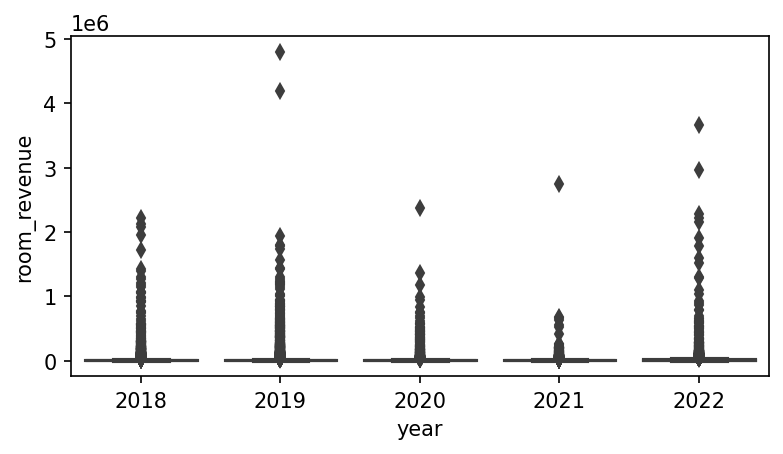

In [45]:
plt.figure(figsize=(6,3),dpi=150)
sns.boxplot(data=df,y='room_revenue',x='year')

**Maximum Variations in Room Revenue per year can be seen in the year 2019,2022 least being in the year 2021.**

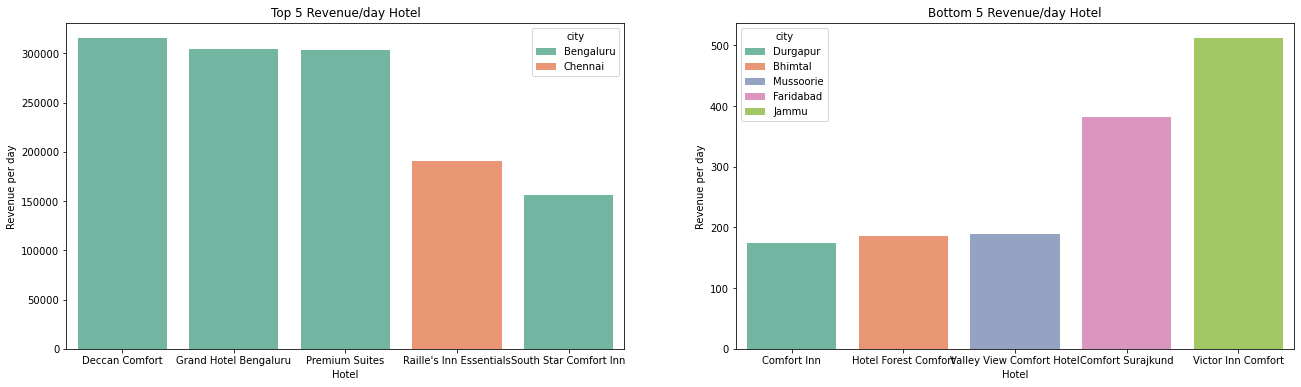

In [46]:
a=df.groupby(['hotel_name','city']).sum()['room_revenue_per_day'].nlargest(5).reset_index()
b=df.groupby(['hotel_name','city']).sum()['room_revenue_per_day'].nsmallest(5).reset_index()

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(22,6))
ax=sns.barplot(ax=axes[0],data=a,x='hotel_name',y='room_revenue_per_day',hue='city',palette='Set2',dodge=False)
ax1=sns.barplot(ax=axes[1],data=b,x='hotel_name',y='room_revenue_per_day',palette='Set2',hue='city',dodge=False)
   
axes[0].set_ylabel('Revenue per day') 
axes[1].set_ylabel('Revenue per day') 
axes[0].set_xlabel('Hotel') 
axes[1].set_xlabel('Hotel') 
    
axes[0].set_title('Top 5 Revenue/day Hotel')
axes[1].set_title('Bottom 5 Revenue/day Hotel')

plt.show()


**Top 5 hotels in Revenue per day are from Bengaluru and Chennai,4 from Bengaluru and 1 from Chennai.<br>
Bottom 5 hotels in Revenue per day are each from Mussorie,Bhimtal,Durgapur,Faridabad,Jammu.**

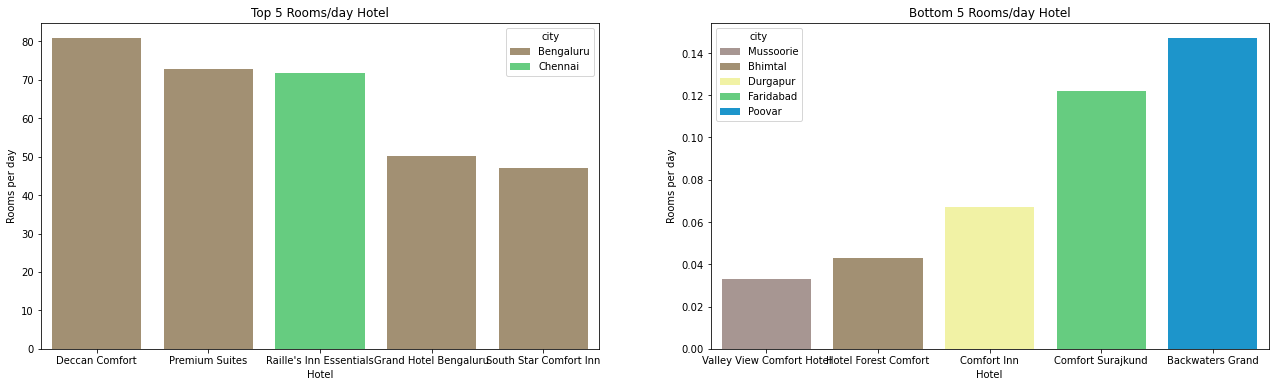

In [47]:
a=df.groupby(['hotel_name','city']).sum()['rooms_per_day'].nlargest(5).reset_index()
b=df.groupby(['hotel_name','city']).sum()['rooms_per_day'].nsmallest(5).reset_index()

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(22,6))
ax=sns.barplot(ax=axes[0],data=a,x='hotel_name',y='rooms_per_day',hue='city',palette="terrain_r",dodge=False)
ax1=sns.barplot(ax=axes[1],data=b,x='hotel_name',y='rooms_per_day',palette="terrain_r",hue='city',dodge=False)
   
axes[0].set_ylabel('Rooms per day') 
axes[1].set_ylabel('Rooms per day') 
axes[0].set_xlabel('Hotel') 
axes[1].set_xlabel('Hotel') 
    
axes[0].set_title('Top 5 Rooms/day Hotel')
axes[1].set_title('Bottom 5 Rooms/day Hotel')

plt.show()


**Top 5 hotels in rooms per day are from Bengaluru and Chennai,4 from Bengaluru and 1 from Chennai.<br>
Bottom 5 hotels in room per day are each from Mussorie,Bhimtal,Durgapur,Faridabad,Poovar.**

# MULTIVARIATE ANALYSIS

In [48]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,rooms_per_day,room_revenue_per_day
0,South Star Comfort Inn,Bengaluru,Business,Midscale,South,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,0.005,18.868
1,Kalyan Essentials,Chennai,Business,Economy,South,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,0.003,9.589
2,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019,0.003,12.329
3,Grand Hotel Bengaluru,Bengaluru,Business,Upper Upscale,South,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019,0.003,19.178
4,Westside Comfort Hotel,Ghaziabad,Business,Midscale,North,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018,0.003,20.548


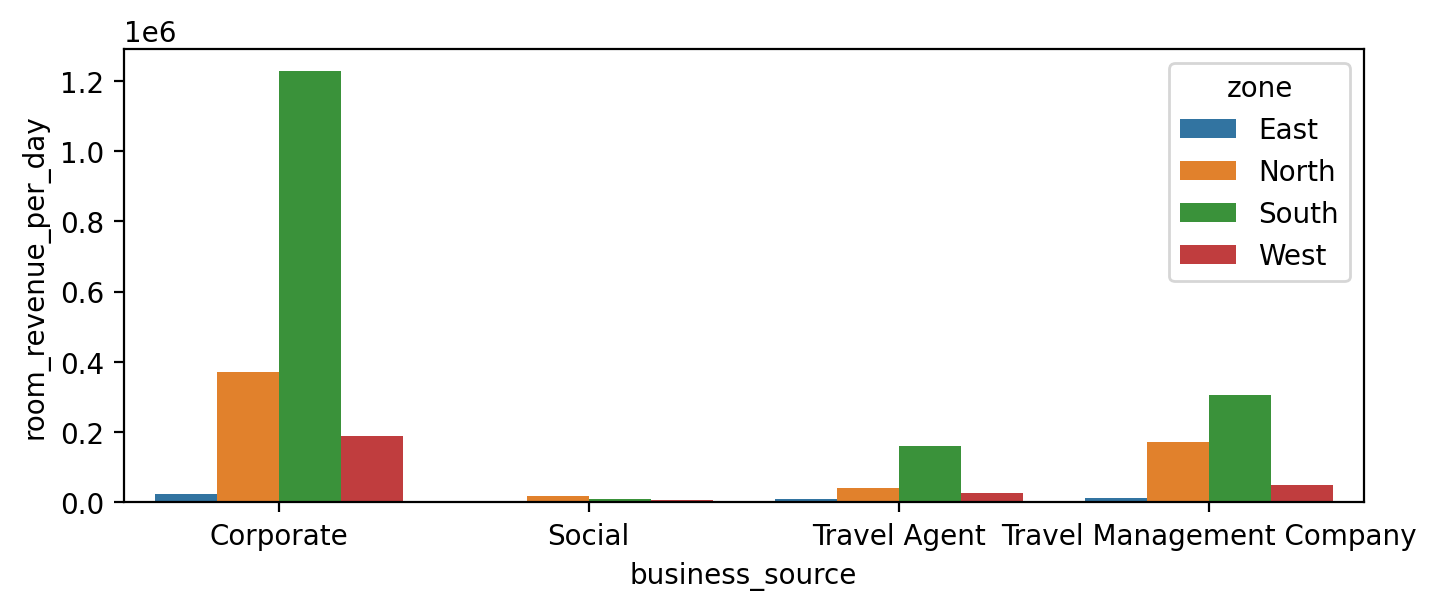

In [49]:

a=df.groupby(['zone','business_source']).sum()['room_revenue_per_day'].reset_index()

plt.figure(figsize=(8,3),dpi=200)

ax=sns.barplot(x='business_source',y='room_revenue_per_day',data=a,hue='zone')

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10)


plt.show()



**In Business Source,Corporate has highest room revenue in all zones.<br>
Least room revenue by Social Business source in all zones.**

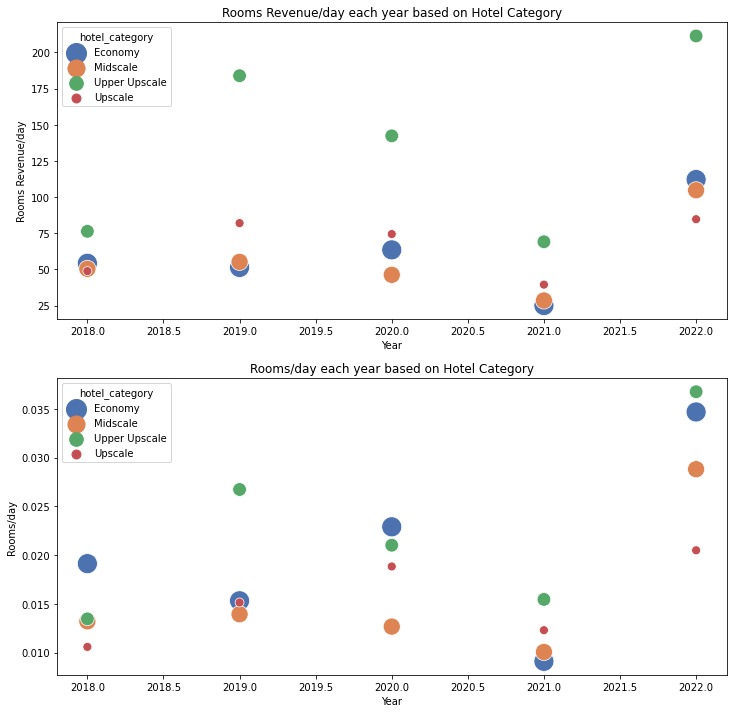

                     room_revenue_per_day  rooms_per_day
year hotel_category                                     
2018 Economy                    54.251049       0.019133
     Midscale                   50.402716       0.013217
     Upper Upscale              76.337460       0.013469
     Upscale                    48.828488       0.010595
2019 Economy                    51.376758       0.015324
     Midscale                   55.201549       0.013942
     Upper Upscale             183.928988       0.026738
     Upscale                    82.019167       0.015149
2020 Economy                    63.521192       0.022910
     Midscale                   46.262925       0.012677
     Upper Upscale             142.347235       0.021024
     Upscale                    74.446193       0.018842
2021 Economy                    25.038455       0.009116
     Midscale                   28.503075       0.010073
     Upper Upscale              69.111430       0.015465
     Upscale                   

In [50]:
a=df.groupby(['year','hotel_category'])['room_revenue_per_day'].mean().reset_index()
b=df.groupby(['year','hotel_category'])['rooms_per_day'].mean().reset_index()



fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,12))
ax=sns.scatterplot(ax=axes[0],data=a,x='year',y='room_revenue_per_day',hue='hotel_category',palette="deep",size="hotel_category",sizes=(80,400))
ax1=sns.scatterplot(ax=axes[1],data=b,x='year',y='rooms_per_day',palette="deep",hue='hotel_category',size="hotel_category",sizes=(80,400))

axes[0].set_ylabel('Rooms Revenue/day') 
axes[1].set_ylabel('Rooms/day') 
axes[0].set_xlabel('Year') 
axes[1].set_xlabel('Year') 
    
axes[0].set_title('Rooms Revenue/day each year based on Hotel Category')
axes[1].set_title('Rooms/day each year based on Hotel Category')

plt.show()


print(df.groupby(['year','hotel_category'])['room_revenue_per_day','rooms_per_day'].mean())

**Room Revenue per day in all the years is highest in the Upper Scale hotel Category.<br>
Room per day in the year 2019,2021,2022 is highest in Upper Scale hotel Category.<br>
and in the year 2018,2020 Economy hotel Category is the highest.**

hotel_category  hotel_type
Economy         Business      175.092
Midscale        Business      280.442
                Leisure        20.160
Upper Upscale   Business       66.928
                Leisure         1.154
Upscale         Business      111.037
                Leisure        23.743
Name: rooms_per_day, dtype: float64


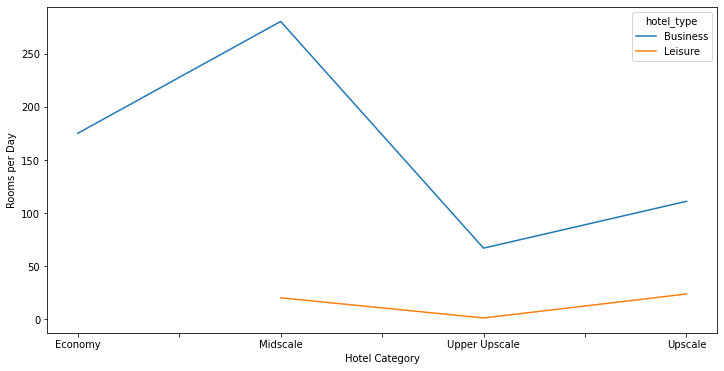

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
df.groupby(['hotel_category','hotel_type']).sum()['rooms_per_day'].unstack().plot(ax=ax)
plt.ylabel('Rooms per Day')
plt.xlabel('Hotel Category')
print(df.groupby(['hotel_category','hotel_type']).sum()['rooms_per_day'])

**Economy category of hotel has only Business type of hotel rest category of hotel has both Business and Leisure category of hotel.<br>
Mostly rooms occupied are of Midscale category of hotel in the Business type after it Economy category of hotel in Business type of hotel.<br>
Least rooms occupied are of Upper scale category of hotel in the Leisure hotel type.**

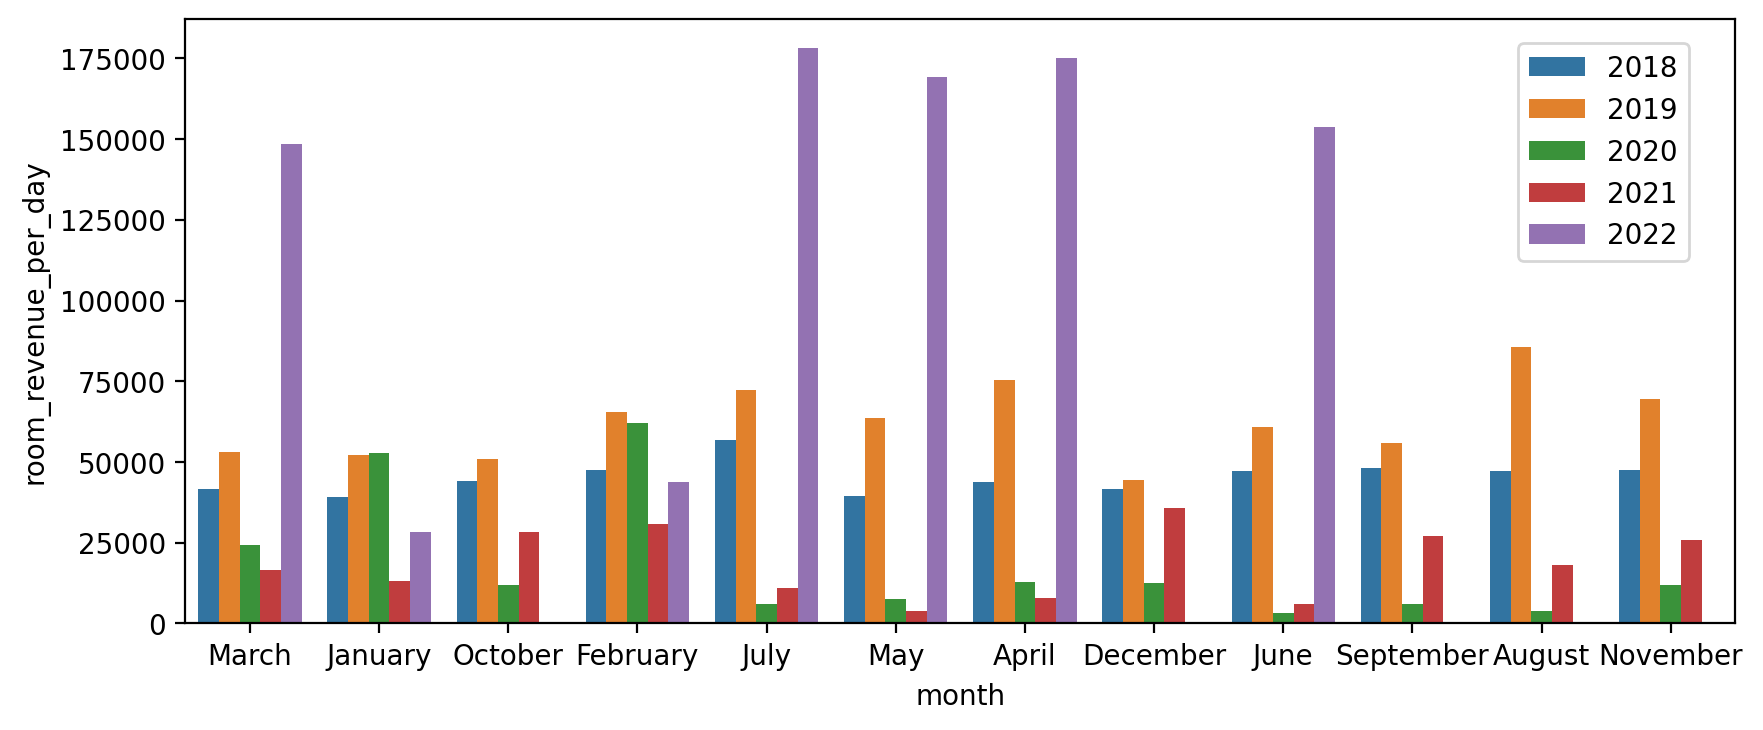

In [52]:
plt.figure(figsize=(10,4),dpi=200)
ax=sns.barplot(data=df,x='month',y='room_revenue_per_day',estimator=np.sum,ci=None,hue='year')
ax.legend(loc=(0.86,0.6))
plt.show()

**We have sky scrappers in the year 2022 in the months of March,April,May,June,July.<br>
If taking rest of the years,2019 has the best revenue in all the months.<br>
Surprisingly in the month of January and February 2020 has almost same or more revenue compared to the year 2019.**


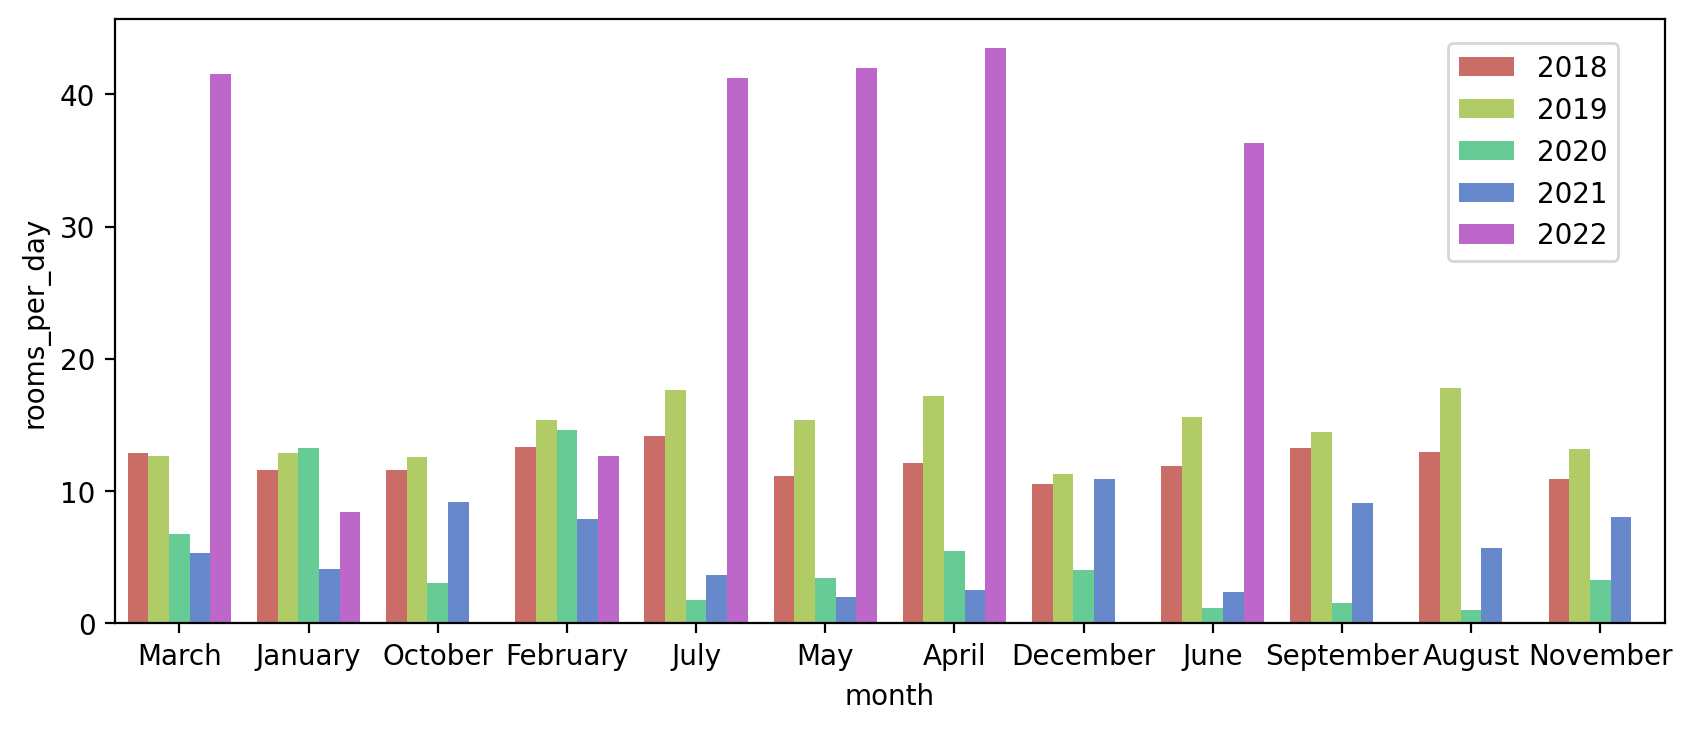

In [53]:
plt.figure(figsize=(10,4),dpi=200)
ax=sns.barplot(data=df,x='month',y='rooms_per_day',estimator=np.sum,ci=None,hue='year',palette="hls")
ax.legend(loc=(0.86,0.6))
plt.show()

**We have sky scrappers in the year 2022 in the months of March,April,May,June,July.<br>
If taking rest of the years,2019 has the best revenue in all the months.<br>
Surprisingly January,2020 has more rooms_per_day then 2019 and March,2018 has more rooms_per_day then 2019.**